In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('./engineered_dataset.csv')
df.head()

,trans_datetime,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,is_entertainment,avg_spend_per_visit,spend_ratio
0,2019-01-01 00:00:00,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,0,2019,5,4,2,1,False,0.828333,0.832496
1,2019-01-01 00:00:00,36078114201167,fraud_Murray-Smitham,grocery_pos,159.54,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,1,0,2019,4,2,1,2,False,812.164000,0.039278
2,2019-01-01 00:00:00,3567527758368741,fraud_Beier LLC,entertainment,4.01,Amanda,Vance,F,14601 Downs Skyway Apt. 440,Sterling City,...,1,0,2019,3,2,1,1,True,620.380000,0.001615
3,2019-01-01 00:00:00,4026222041577,"fraud_Huel, Hammes and Witting",grocery_pos,195.22,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,1,0,2019,1,1,1,1,False,1269.145000,0.076880
4,2019-01-01 00:00:00,341546199006537,"fraud_Bins, Balistreri and Beatty",shopping_pos,268.16,Mark,Brown,M,8580 Moore Cove,Wales,...,1,0,2019,2,1,1,1,True,4128.116667,0.021651


In [39]:
df.describe(include="all")

,trans_datetime,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,is_entertainment,avg_spend_per_visit,spend_ratio
count,1482976,1.482976e+06,1482976,1482976,1.482976e+06,1482976,1482976,1482976,1482976,1482976,...,1.482976e+06,1.482976e+06,1.482976e+06,1.482976e+06,1.482976e+06,1.482976e+06,1.482976e+06,1482976,1.482976e+06,1.482976e+06
unique,3456,NaN,693,14,NaN,355,486,2,999,906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,2019-12-06 23:00:00,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,372 Jeffrey Course,Birmingham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,1688,NaN,5002,150533,NaN,30489,32715,811215,3593,6539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,988498,NaN,NaN
mean,NaN,4.183012e+17,NaN,NaN,7.018088e+01,NaN,NaN,NaN,NaN,NaN,...,3.706667e+00,1.280541e+01,2.019498e+03,5.297121e+00,3.148876e+00,1.388520e+00,1.604083e+00,NaN,7.448850e+02,5.710571e-02
std,NaN,1.310377e+18,NaN,NaN,1.598960e+02,NaN,NaN,NaN,NaN,NaN,...,1.815099e+00,6.816984e+00,4.999964e-01,3.093869e+00,1.864566e+00,6.718596e-01,8.567565e-01,NaN,7.679945e+02,1.424982e-01
min,NaN,6.041621e+10,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,9.454545e-02,3.097998e-05
25%,NaN,1.800400e+14,NaN,NaN,9.660000e+00,NaN,NaN,NaN,NaN,NaN,...,2.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,NaN,2.446165e+02,4.045438e-03
50%,NaN,3.521417e+15,NaN,NaN,4.753000e+01,NaN,NaN,NaN,NaN,NaN,...,4.000000e+00,1.400000e+01,2.019000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,NaN,5.320910e+02,1.372523e-02
75%,NaN,4.642255e+15,NaN,NaN,8.316000e+01,NaN,NaN,NaN,NaN,NaN,...,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00,NaN,9.851849e+02,4.031536e-02


In [40]:
legitimate = df[(df['is_entertainment']) & (df['is_fraud'] == 0)]
print(f"Transacciones legítimas: {len(legitimate)}")
fraudulent = df[(df['is_entertainment']) & (df['is_fraud'] == 1)]
print(f"Transacciones fraudulentas: {len(fraudulent)}")

Transacciones legítimas: 491070
Transacciones fraudulentas: 3408


In [41]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

for col in df.select_dtypes(include='object').columns:
	df[col] = df[col].astype('category')

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_model = X_train.drop(columns=['is_entertainment'])
X_test_model  = X_test .drop(columns=['is_entertainment'])

train_data = lgb.Dataset(X_train_model, label=y_train)
valid_data = lgb.Dataset(X_test_model, label=y_test)

In [42]:
def feval_ratio_fp(preds, data):
	y_true = data.get_label()
	y_pred = (preds > 0.5).astype(int)

	TP = ((y_true == 1) & (y_pred == 1)).sum()
	FP = ((y_true == 0) & (y_pred == 1)).sum()

	if TP == 0:
		return 'ratio_fp', float('inf'), False

	ratio_fp = (TP + FP) / TP
	return 'ratio_fp', ratio_fp, False

In [43]:
def feval_fp_penalty(preds, data, alpha=2.0):
	y_true = data.get_label()
	y_pred = (preds > 0.5).astype(int)

	TP = ((y_true == 1) & (y_pred == 1)).sum()
	FP = ((y_true == 0) & (y_pred == 1)).sum()
	FN = ((y_true == 1) & (y_pred == 0)).sum()

	if TP == 0:
		return 'fp_penalty_f1', 0.0, True

	prec = TP / (TP + alpha * FP) if (TP + alpha * FP) > 0 else 0
	rec = TP / (TP + FN) if (TP + FN) > 0 else 0

	if prec + rec == 0:
		f1_penalized = 0.0
	else:
		f1_penalized = 2 * prec * rec / (prec + rec)

	return 'fp_penalty_f1', f1_penalized, True

In [44]:
def feval_all(preds, data):
	return [
		feval_ratio_fp(preds, data),
		feval_fp_penalty(preds, data, alpha=2.0)
	]

In [45]:
# Params
params = {
	'min_child_samples': 150,
	'boosting_type': 'gbdt',
	'class_weight': 'balanced',
	'objective': 'binary',
	'learning_rate': 0.01,
	'num_leaves': 25,
	'verbose': -1,
	'metric': 'auc'
}

# Modelo Filtrado

In [46]:
# Train
model = lgb.train(
	params,
	train_data,
	valid_sets=[valid_data],
	num_boost_round=2000,
	feval = feval_fp_penalty,
	callbacks=[
		lgb.early_stopping(100),
		lgb.log_evaluation(100)
	]
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.993381	valid_0's fp_penalty_f1: 0.711043
[200]	valid_0's auc: 0.99574	valid_0's fp_penalty_f1: 0.768538
[300]	valid_0's auc: 0.996737	valid_0's fp_penalty_f1: 0.792769
[400]	valid_0's auc: 0.997459	valid_0's fp_penalty_f1: 0.801967
[500]	valid_0's auc: 0.997752	valid_0's fp_penalty_f1: 0.814935
[600]	valid_0's auc: 0.997853	valid_0's fp_penalty_f1: 0.8219
[700]	valid_0's auc: 0.997993	valid_0's fp_penalty_f1: 0.828095
[800]	valid_0's auc: 0.998067	valid_0's fp_penalty_f1: 0.832692
[900]	valid_0's auc: 0.998157	valid_0's fp_penalty_f1: 0.83456
[1000]	valid_0's auc: 0.998203	valid_0's fp_penalty_f1: 0.838193
[1100]	valid_0's auc: 0.99825	valid_0's fp_penalty_f1: 0.843489
[1200]	valid_0's auc: 0.998262	valid_0's fp_penalty_f1: 0.848077
[1300]	valid_0's auc: 0.998301	valid_0's fp_penalty_f1: 0.848815
[1400]	valid_0's auc: 0.998335	valid_0's fp_penalty_f1: 0.850288
Early stopping, best iteration is:
[1377]	

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

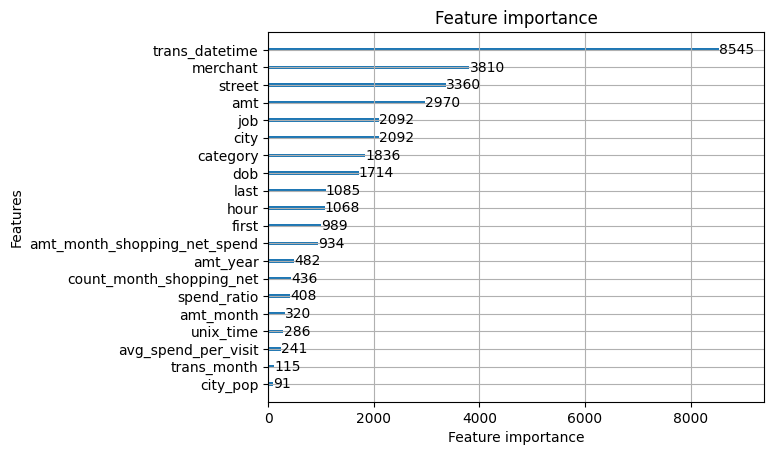

In [65]:
lgb.plot_importance(model, max_num_features=20)

In [ ]:
# Predict and evaluate
y_pred_proba = model.predict(X_test_model)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print(f"\nAUC: {roc_auc_score(y_test, y_pred_proba) * 100:.4f}%")


--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294963
           1       0.92      0.70      0.80      1633

    accuracy                           1.00    296596
   macro avg       0.96      0.85      0.90    296596
weighted avg       1.00      1.00      1.00    296596


--- Confusion Matrix ---
[[294868     95]
 [   491   1142]]

AUC: 99.5948%


In [ ]:
fp_mask = (y_test == 0) & (y_pred == 1)
fp_count_entertainment = fp_mask[X_test['is_entertainment'] == True].sum()
fp_total = fp_mask.sum()

print(f"\nFalse Positives (Entertainment): {fp_count_entertainment}")
print(f"Total False Positives: {fp_total}")


False Positives (Entertainment): 76
Total False Positives: 95


# Modelo General

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

all_model = lgb.train(
	params,
	train_data,
	valid_sets=[valid_data],
	num_boost_round=2000,
	feval = feval_fp_penalty,
	callbacks=[
		lgb.early_stopping(100),
		lgb.log_evaluation(100)
	]
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.990603	valid_0's fp_penalty_f1: 0.573385
[200]	valid_0's auc: 0.99329	valid_0's fp_penalty_f1: 0.72549
[300]	valid_0's auc: 0.994653	valid_0's fp_penalty_f1: 0.745194
[400]	valid_0's auc: 0.995327	valid_0's fp_penalty_f1: 0.752989
[500]	valid_0's auc: 0.995608	valid_0's fp_penalty_f1: 0.760325
[600]	valid_0's auc: 0.995729	valid_0's fp_penalty_f1: 0.763575
[700]	valid_0's auc: 0.995812	valid_0's fp_penalty_f1: 0.765872
[800]	valid_0's auc: 0.995861	valid_0's fp_penalty_f1: 0.766902
Early stopping, best iteration is:
[711]	valid_0's auc: 0.995814	valid_0's fp_penalty_f1: 0.767418


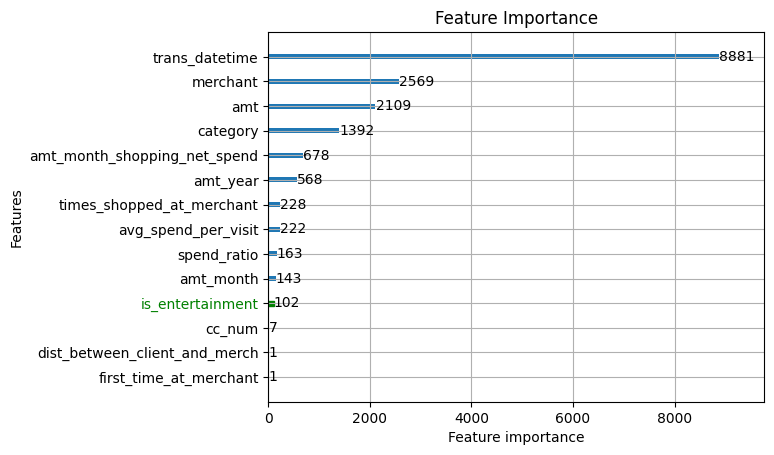

In [67]:
ax = lgb.plot_importance(all_model, max_num_features=20, importance_type='split', title="Feature Importance")
for bar, label in zip(ax.patches, ax.get_yticklabels()):
	if label.get_text() == 'is_entertainment':
		label.set_color('green')
		bar.set_color('green')

# Métricas y Comparaciones

In [ ]:
# Predict and evaluate
all_y_pred_proba = all_model.predict(X_test)
all_y_pred = (all_y_pred_proba > 0.5).astype(int)

print("\n--- Classification Report All ---")
print(classification_report(y_test, all_y_pred))
print("--- Classification Report ---")
print(classification_report(y_test, y_pred))


print("\n--- Confusion Matrix All ---")
print(confusion_matrix(y_test, all_y_pred))
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))
# TN FP
# FN TP


print(f"\nAUC All: {roc_auc_score(y_test, all_y_pred_proba) * 100:.4f}%")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba) * 100:.4f}%")


--- Classification Report All ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294963
           1       0.92      0.70      0.79      1633

    accuracy                           1.00    296596
   macro avg       0.96      0.85      0.90    296596
weighted avg       1.00      1.00      1.00    296596

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294963
           1       0.92      0.70      0.80      1633

    accuracy                           1.00    296596
   macro avg       0.96      0.85      0.90    296596
weighted avg       1.00      1.00      1.00    296596


--- Confusion Matrix All ---
[[294864     99]
 [   493   1140]]
--- Confusion Matrix ---
[[294868     95]
 [   491   1142]]

AUC All: 99.5814%
AUC: 99.5948%


In [ ]:
all_fp_mask = (y_test == 0) & (all_y_pred == 1)
all_fp_count_entertainment = all_fp_mask[X_test['is_entertainment'] == True].sum()
all_fp_total = all_fp_mask.sum()

print("\n--- FP All ---")
print(f"False Positives (Entertainment): {all_fp_count_entertainment}")
print(f"Total False Positives: {all_fp_total}")
print("--- FP ---")
print(f"False Positives (Entertainment): {fp_count_entertainment}")
print(f"Total False Positives: {fp_total}")


--- FP All ---
False Positives (Entertainment): 78
Total False Positives: 99
--- FP ---
False Positives (Entertainment): 76
Total False Positives: 95
